shuffled_index: [ 6  2  9  4  8 14 19  1 11 13 16 17  0 12 18 10 15  3  5  7]
train_data: [[ 1.50146275  2.76432549 -1.        ]
 [ 1.06834281  2.88666088 -1.        ]
 [ 3.18222626  3.11937572 -1.        ]
 [ 1.22742456  2.86298719 -1.        ]
 [ 3.66571909  3.7381882  -1.        ]
 [ 8.39351834  4.94086402  1.        ]
 [ 5.80488674  6.25923824  1.        ]
 [ 2.85228509  1.29292904 -1.        ]
 [ 6.47816715 13.32810611  1.        ]
 [10.64271804  8.87563857  1.        ]
 [ 7.53732905  5.70554999  1.        ]
 [ 7.15410931 10.66109393  1.        ]
 [ 2.16608544  2.78196448 -1.        ]
 [ 8.33634151  8.36273169  1.        ]
 [ 6.14433234  8.21055968  1.        ]
 [ 4.26789032  6.72717204  1.        ]
 [ 7.32503921  6.07725715  1.        ]
 [ 1.77821034  2.38172358 -1.        ]
 [ 1.71873997  1.06807457 -1.        ]
 [ 2.19150443  1.38123617 -1.        ]]


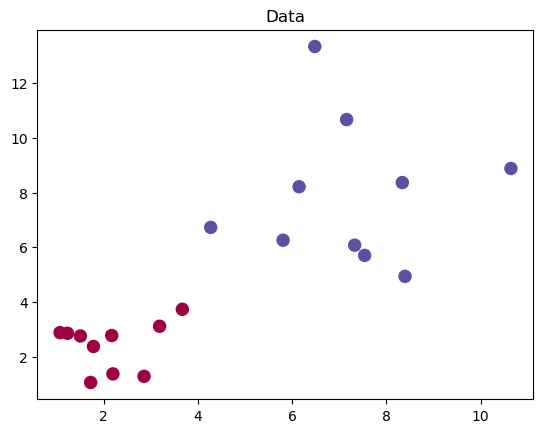

In [16]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(314)

data_size1 = 10
x1 = np.random.randn(data_size1,2)+np.array([2,2])
y1 = [-1 for _ in range(data_size1)]
data_size2 = 10
x2 = np.random.randn(data_size2,2)*2 + np.array([8,8])
y2 = [1 for _ in range(data_size2)]
x = np.concatenate((x1,x2),axis=0)
y = np.concatenate((y1,y2),axis=0)

shuffled_index = np.random.permutation(data_size1+data_size2)
print("shuffled_index:", shuffled_index)
x = x[shuffled_index]
y = y[shuffled_index]
train_data = np.concatenate((x,y[:,np.newaxis]),axis=1)
print("train_data:", train_data)

plt.scatter(train_data[:,0], train_data[:,1], marker=".", s=300, c = y, cmap=plt.cm.Spectral)
plt.title("Data")
plt.show()

In [17]:
import random
import numpy as np

def sign(v):
    if v>0: return 1
    else: return -1
    
def perceptron_train(train_data, eta = 0.5, n_iter=100):
    weight = [0,0]
    bias = 0
    learning_rate = eta
    train_num = n_iter
    for i in range(train_num):
        ti = np.random.randint(len(train_data))
        [x1,x2,y] = train_data[ti]
        y_pred = sign(weight[0]*x1 + weight[1]*x2+bias)
        if y*y_pred <= 0:
            weight[0] = weight[0] + learning_rate * y * x1
            weight[1] = weight[1] + learning_rate * y * x2
            bias = bias + learning_rate  * y
            print("update weight/bias:", weight[0], weight[1], bias)
    return weight, bias

def perceptron_pred(data, w, b):
    y_pred = []
    for d in data:
        x1,x2,y = d
        yi = sign(w[0]*x1+w[1]*x2+b)
        y_pred.append(yi)
    return np.array(y_pred, dtype = float)

w,b = perceptron_train(train_data)
print("w=", w)
print("b=", b)

y_pred = perceptron_pred(train_data, w, b)

# 计算分类精度
c = y_pred == y
cn = np.sum(c == True)
acc = cn / len(y_pred)
print()

# 因为前面是随机性，准确率结果可能每次不同
print("\n")
print("ground_truth: ", train_data[:, 2])
print("predicted:    ", y_pred)
print("accuracy:     ", acc)


update weight/bias: 3.662519607024163 3.038628576040485 0.5
update weight/bias: 3.1283482021588505 1.595298136548129 0.0
update weight/bias: 1.7022056555578562 0.9488336160189257 -0.5
update weight/bias: 0.6064534385664728 0.25821553124912766 -1.0
update weight/bias: -0.0072588404447664345 -1.1732780618880432 -1.5
update weight/bias: 3.56979581700504 4.157268901515593 -1.0
update weight/bias: 2.7104258301108155 3.6232316160976543 -1.5
update weight/bias: 1.6146736131194321 2.9326135313278563 -2.0
update weight/bias: 1.0805022082541196 1.4892830918355 -2.5
update weight/bias: -0.3456403383468747 0.8428185713062968 -3.0
update weight/bias: 3.4230241861565407 3.6955935657768997 -2.5
update weight/bias: 2.5636541992623156 3.161556280358961 -3.0
update weight/bias: 1.1375116526613214 2.5150917598297577 -3.5
update weight/bias: 0.38678027777241897 1.1329290169473543 -4.0
update weight/bias: -1.446079265832824 -0.7361650837497964 -4.5
update weight/bias: 1.7930043074867144 5.9278879714909145 